In [2]:
# Set up
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
transactions = pd.read_csv('HW1 clv_transactions.csv')

# Step 1: Understand the Dataset
1. Are there any missing values?
    - There are **no missing values**.
    - See results of `transactions.info()` (the non-null counts are the same as the number of records) and the results of theloop.
2. What is the range of dates?
    - Dates range from **January 4, 2010 through December 31, 2015**.
3. How many unique customers are there? 
    - There are **1000 unique customers** (i.e., 1000 distinct values of `CustomerID`).
4. Profile the data to give the standard descriptive statistics for the `Amount` field. What is the `min`, `max`, `variance`, and `standard_deviation`?
    - `min`: -1.00
    - `max`: 2033.00
    - `var`: 1499.54
    - `std`: 38.72
5. Do transaction amounts in general increase over time (perhaps due to inflation)?
    - From looking at the scatterplot of transactions, the `Amount` per transaction seems to increase slightly over time.
    - We could attribute that to inflation, but we would need to know more about the business to be more certain (e.g., prices could be rising due to increases in supply and/or demand or macroeconomic factors).

Number of missing values:
TransactionID: 0
TransactionDate: 0
CustomerID: 0
Amount: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    4186 non-null   int64  
 1   TransactionDate  4186 non-null   object 
 2   CustomerID       4186 non-null   int64  
 3   Amount           4186 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 130.9+ KB
count    4186.000000
mean        9.028082
std        38.723909
min        -1.000000
25%         3.310000
50%         6.885000
75%        11.690000
max      2033.000000
Name: Amount, dtype: float64


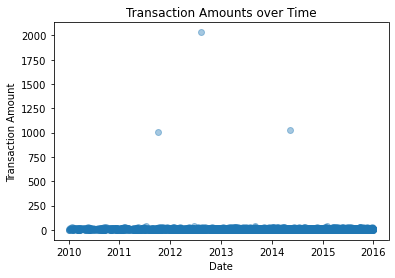

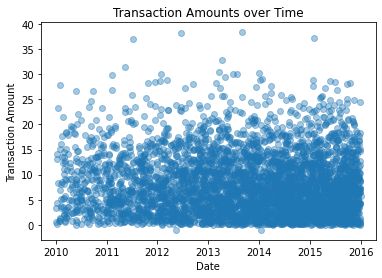

In [3]:
# Are there any missing values? 
print('Number of missing values:')
for i in transactions.columns:
    print(i, ': ', np.sum(transactions[i].isna == True), sep = '')
transactions.info()

# What is the range of dates?
transactions.TransactionDate = pd.to_datetime(transactions.TransactionDate)
transactions.TransactionDate.agg([min, max])

# How many unique customers are there?
transactions.CustomerID.value_counts(sort = True)

# Profile the data to give the standard descriptive statistics for the Amount field. What is the min, max, variance, and standard_deviation?
print(transactions.Amount.describe())
transactions.Amount.agg([min, max, np.mean, np.var, np.std]) # there are negative amounts and amounts in the 1000s

# Do transaction amounts in general increase over time (perhaps due to inflation)?
plt.scatter(transactions.TransactionDate, transactions.Amount, alpha = 0.4)
plt.title('Transaction Amounts over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()

plt.scatter(transactions.TransactionDate[transactions.Amount < 250], transactions.Amount[transactions.Amount < 250], alpha = 0.4)
plt.title('Transaction Amounts over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()

# Check for duplicates
# transactions[transactions.duplicated(['TransactionID', 'CustomerID']) == True]
# transactions.Amount.value_counts(sort = True, normalize = True)

# Other checks
# transactions.info()
# transactions.describe().transpose()
# transactions.shape

# Step 2: Explore the Dataset
1. Are there any outliers?
    - Yes, there appear to be outliers in terms of the `Amount` variable (i.e., 3 records of more than 50 and 2 records of -1.00).
    - There are also negative amounts. 
    - I found these outliers both by looking at the descriptive statistics and scatterplots above as well as examining data points that were more than two standard deviations above or below the mean.
    
2. If so, how would you treat them?
    - I chose to drop the records with negative amounts because they did not appear to be refunds (i.e., they were few in number and were both round numbers). 
        - Replacing them with either the `mean` or `median` seems risky given that these seem more like system errors than incorrect transaction amounts.
    - For records with amounts above 50, I chose to replace them with the median transaction amount for the given customer.
        - I did not use the customer group-wise mean, as it would be influenced by these outliers.
        - I also confirmed that the medians were within a reasonable range based on the distribution of the `Amount` variable.
            - That is, there was no customer for whom all transaction amounts were outliers.
        - I could have used the median amount by year of transaction.
            - Of the three customers, the median would have been an acceptable substitute for two of them (the year-wise median would have underestimated the imputation for records with a `CustomerID` of 7 by a small margin).
        - I also could have dropped these records (as they are few), or divided them by 100 or 1000 (on the assumption that they were missing a decimal point).

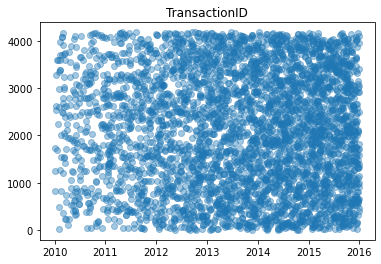

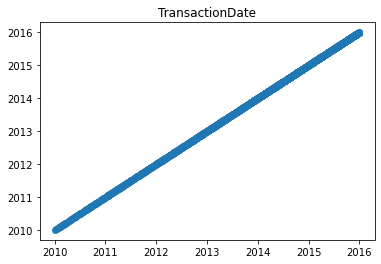

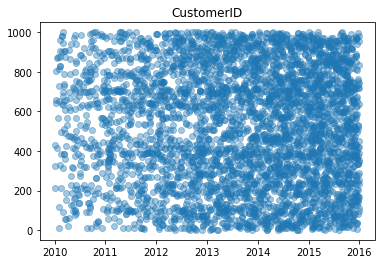

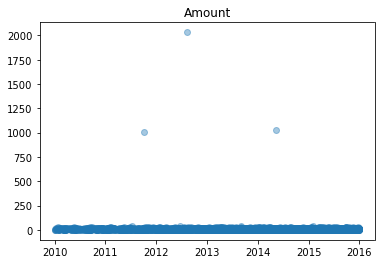

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TransactionID TransactionDate  CustomerID  Amount  TransactionYear  \
0                 1      2012-09-04           1   20.26             2012   
1                 2      2012-05-15           2   10.87             2012   
2                 3      2014-05-23           2    2.21             2014   
3                 4      2014-10-24           2   10.48             2014   
4                 5      2012-10-13           2    3.94             2012   
...             ...             ...         ...     ...              ...   
4181           4182      2013-06-23        1000    3.86             2013   
4182           4183      2011-08-07        1000    4.00             2011   
4183           4184      2012-10-07        1000   18.37             2012   
4184           4185      2014-01-09        1000    3.45             2014   
4185           4186      2011-04-30        1000    5.18             2011   

      MedianByYear  MedianByCust  
0             7.13        20.260  
1             7.13         3.725  
2             6.45         3.725  
3             6.45         3.725  
4             7.13         3.725  
...            ...           ...  
4181          7.26         5.465  
4182          6.79         5.465  
4183          7.13         5.465  
4184          6.45         5.465  
4185          6.79         5.465  

[4184 rows x 7 columns]

In [4]:
# Are there any outliers?
for i in transactions.columns:
    plt.scatter(transactions.TransactionDate, transactions[i], alpha = 0.4) # now amount looks better
    plt.title(i)
    plt.show()
    # More than 2 SD from mean (create if condition because operation will fail on datetime)
#     if i != 'TransactionDate':
#         display(transactions[transactions[i] > np.mean(transactions[i]) + 2 * np.std(transactions[i])])
#         display(transactions[transactions[i] < np.mean(transactions[i]) - 2 * np.std(transactions[i])])

# If so, how should we treat them?
transactions['TransactionYear'] = pd.DatetimeIndex(transactions.TransactionDate).year
transactions['MedianByYear'] = transactions.groupby('TransactionYear')['Amount'].transform(np.median)
transactions['MedianByCust'] = transactions.groupby('CustomerID')['Amount'].transform(np.median)
transactions.query('Amount > 50')
for r in range(len(transactions)):
    if transactions.Amount[r] > 50:
        transactions.Amount[r] = transactions.MedianByCust[r]
    else:
        pass
transactions = transactions.query('Amount >= 0')
display(transactions)


# Step 3: Determine Origin Year of Customers
1. Assign `OriginYear` to all customers based on year of first transaction.

In [5]:
transactions['TransactionYear'] = pd.DatetimeIndex(transactions.TransactionDate).year
transactions['OriginYear'] = transactions.groupby('CustomerID')['TransactionYear'].transform(min)
# Look at an example
transactions[transactions.CustomerID == 1000].sort_values('TransactionDate')
display(transactions)

TransactionID TransactionDate  CustomerID  Amount  TransactionYear  \
0                 1      2012-09-04           1   20.26             2012   
1                 2      2012-05-15           2   10.87             2012   
2                 3      2014-05-23           2    2.21             2014   
3                 4      2014-10-24           2   10.48             2014   
4                 5      2012-10-13           2    3.94             2012   
...             ...             ...         ...     ...              ...   
4181           4182      2013-06-23        1000    3.86             2013   
4182           4183      2011-08-07        1000    4.00             2011   
4183           4184      2012-10-07        1000   18.37             2012   
4184           4185      2014-01-09        1000    3.45             2014   
4185           4186      2011-04-30        1000    5.18             2011   

      MedianByYear  MedianByCust  OriginYear  
0             7.13        20.260        2012  
1             7.13         3.725        2012  
2             6.45         3.725        2012  
3             6.45         3.725        2012  
4             7.13         3.725        2012  
...            ...           ...         ...  
4181          7.26         5.465        2010  
4182          6.79         5.465        2010  
4183          7.13         5.465        2010  
4184          6.45         5.465        2010  
4185          6.79         5.465        2010  

[4184 rows x 8 columns]

# Step 4: Calculate Cumulative Transaction Amounts
1. Grouping by `OriginYear`, calculate cumulative transaction totals.

In [6]:
# Grouping by `OriginYear`, calculate cumulative transaction totals
transactions
transactions['Age'] = (transactions.TransactionYear - transactions.OriginYear + 1) * 12
cumulative_amount = transactions.groupby(['OriginYear', 'Age'])['Amount'].sum().groupby('OriginYear').cumsum().to_frame().reset_index().pivot(index = 'OriginYear', columns = 'Age', values = 'Amount').fillna('')
# Display two decimal points
pd.options.display.float_format = "{:,.2f}".format
display(cumulative_amount)

Age              12       24       36       48       60       72
OriginYear                                                      
2010       2,259.67 3,614.78 5,280.27 6,637.83 7,936.15 8,969.95
2011       2,251.69 3,797.59 5,513.86 6,750.98 7,910.11         
2012       2,154.89 3,840.05 5,192.22 6,467.21                  
2013       2,179.85 3,609.81 5,227.75                           
2014       1,838.73 3,269.93                                    
2015       1,912.17

# Step 5: Calculate Cumulative Numbers of Customers
1. Grouping by `OriginYear`, calculate cumulative number of customers.

In [7]:
# Grouping by OriginYear, calculate cumulative number of customers.
cumulative_customers = transactions.groupby(['OriginYear', 'Age'])['CustomerID'].nunique().to_frame().reset_index().pivot(index = 'OriginYear', columns = 'Age', values = 'CustomerID')#.fillna('')

for i in cumulative_customers.columns: 
    cumulative_customers[i] = cumulative_customers[12].astype(int)
    if i != 12: 
        j = int(- 1 * i / 12 + 1)
        cumulative_customers[i][j:] = ''
cumulative_customers

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Age          12   24   36   48   60   72
OriginYear                              
2010        172  172  172  172  172  172
2011        171  171  171  171  171     
2012        162  162  162  162          
2013        180  180  180               
2014        155  155                    
2015        160

# Step 6: Historic CLV
1. Divide `cumulative_amount` by `cumulative_customers` to get total amount spent per year.
2. Plot the results.
3. Calculate volume-weighted average of the historic CLV for each group at each age, weighted by the number of customers in each group.

Age           12    24    36    48    60    72
OriginYear                                    
2010       13.14 21.02 30.70 38.59 46.14 52.15
2011       13.17 22.21 32.24 39.48 46.26      
2012       13.30 23.70 32.05 39.92            
2013       12.11 20.05 29.04                  
2014       11.86 21.10                        
2015       11.95

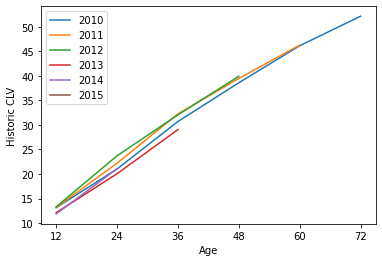

Volume-Weighted Average:


Age
12   12.60
24   21.59
36   30.97
48   39.32
60   46.20
72   52.15
dtype: float64

Unweighted Average (for Comparison):


Age
12   12.59
24   21.62
36   31.01
48   39.33
60   46.20
72   52.15
dtype: float64

In [8]:
# Divide `cumulative_amount` by `cumulative_customers` to get total amount spent per year
# Convert cumulative objects to numeric to be able to divide
cumulative_amount = pd.to_numeric(cumulative_amount[cumulative_amount.columns].stack(), errors='coerce').unstack()
cumulative_customers = pd.to_numeric(cumulative_customers[cumulative_customers.columns].stack(), errors='coerce').unstack()
historic_clv = cumulative_amount / cumulative_customers # matrix division, thank goodness
historic_clv_display = historic_clv.fillna('')
display(historic_clv_display)

# Plot the results
for a in range(2010, 2016):
    plt.plot(historic_clv.transpose()[a], label = a)
plt.ylabel('Historic CLV')
plt.xlabel('Age')
plt.legend()
plt.xticks(ticks = list(range(12, 84, 12)))
plt.show()

# Calculate volume-weighted average of the historic CLV for each group at each age, 
test = cumulative_customers.transpose().assign(Total = cumulative_customers.transpose().sum(axis = 1))
for c in range(2010, 2016):
    test[c] = test[c] / test['Total']
print('Volume-Weighted Average:')
display((test * historic_clv.transpose()).sum(axis = 1))

# Unweighted average
print('Unweighted Average (for Comparison):')
display(historic_clv.mean())

# Step 7: Interpret the Results
1. How much have customers acquired in 2011 spent to date?
    - Customers acquired in 2011 have spent a total of **\$46.26**.
2. Does each group of customers exhibit similar or different patterns of spending? What is the implication for the business?
    - The CLV for most groups follows a similar slope/trend and seems to have a similar starting point. 
    - As you can see, the differences are greatest between the 2013 and 2014 cohorts, but those differences appear small.

In [9]:
# How much have customers acquired in 2011 spent to date?
display(historic_clv_display[1:2])

# Does each group of customers exhibit similar or different patterns of spending? What is the implication for the business?

Age           12    24    36    48    60 72
OriginYear                                 
2011       13.17 22.21 32.24 39.48 46.26